# Data Exploration
I will use this notebook to do some inital cleaning and exploration of the data to inspect which features have large amounts of nulls and have a high impact on the predictor vairable 'RainTomorrow

## 1 Imports

In [47]:
# importing packages
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from scipy.stats import kde

plt.rcParams["figure.figsize"] = (20,10)

## 2 Loading Data & Initial Cleaning

In [4]:
# Load the data from csv
df = pd.read_csv("Kaggle Training Data.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01/11/2007,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,68.0,29.0,1019.7,1015.0,7.0,7.0,14.4,23.6,No,Yes
1,02/11/2007,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,80.0,36.0,1012.4,1008.4,5.0,3.0,17.5,25.7,Yes,Yes
2,03/11/2007,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,82.0,69.0,1009.5,1007.2,8.0,7.0,15.4,20.2,Yes,Yes
3,04/11/2007,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,62.0,56.0,1005.5,1007.0,2.0,7.0,13.5,14.1,Yes,Yes
4,05/11/2007,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,68.0,49.0,1018.3,1018.5,7.0,7.0,11.1,15.4,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116362,10/11/2015,NorfolkIsland,16.2,22.7,0.0,6.0,9.5,WNW,33.0,NW,...,63.0,72.0,1015.0,1012.9,3.0,7.0,20.9,21.3,No,Yes
116363,10/11/2015,Penrith,13.1,31.3,0.0,NaN,NaN,ESE,30.0,NNE,...,69.0,28.0,NaN,NaN,NaN,NaN,19.0,30.1,No,No
116364,10/11/2015,Richmond,11.7,30.8,0.0,6.4,NaN,E,31.0,SE,...,76.0,32.0,1015.8,1012.1,NaN,NaN,18.3,29.7,No,No
116365,10/11/2015,Sydney,15.2,25.6,0.0,6.0,11.3,ENE,30.0,S,...,61.0,45.0,1016.0,1013.5,3.0,7.0,20.6,24.8,No,No


In [5]:
# Checking data types of each column
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [6]:
# Check number of rows and how many are not-null by feature
df.count()

Date             116367
Location         116367
MinTemp          115280
MaxTemp          115485
Rainfall         113760
Evaporation       70422
Sunshine          66258
WindGustDir      107819
WindGustSpeed    107882
WindDir9am       107495
WindDir3pm       113549
WindSpeed9am     114799
WindSpeed3pm     114603
Humidity9am      114250
Humidity3pm      114034
Pressure9am      104491
Pressure3pm      104525
Cloud9am          73230
Cloud3pm          71917
Temp9am          114923
Temp3pm          114747
RainToday        113760
RainTomorrow     113760
dtype: int64

In [7]:
# How many nulls by feature
df.isnull().sum()

Date                 0
Location             0
MinTemp           1087
MaxTemp            882
Rainfall          2607
Evaporation      45945
Sunshine         50109
WindGustDir       8548
WindGustSpeed     8485
WindDir9am        8872
WindDir3pm        2818
WindSpeed9am      1568
WindSpeed3pm      1764
Humidity9am       2117
Humidity3pm       2333
Pressure9am      11876
Pressure3pm      11842
Cloud9am         43137
Cloud3pm         44450
Temp9am           1444
Temp3pm           1620
RainToday         2607
RainTomorrow      2607
dtype: int64

#### Initial read is that 'Evaporation', 'Sunshine', 'Pressure9am/3pm', 'Cloud9am/3pm' have the highest nummber of nulls. Next steps are to do some initial cleaning 

In [8]:
# Convert rain variables to booleans from Yes/No objects
df['RainToday'] = df['RainToday'] == 'Yes'
df['RainTomorrow'] = df['RainTomorrow'] == 'Yes'

In [9]:
# Convert dates to datetime
df['Date'] = pd.to_datetime(df['Date'])

## 3 Data Exploration

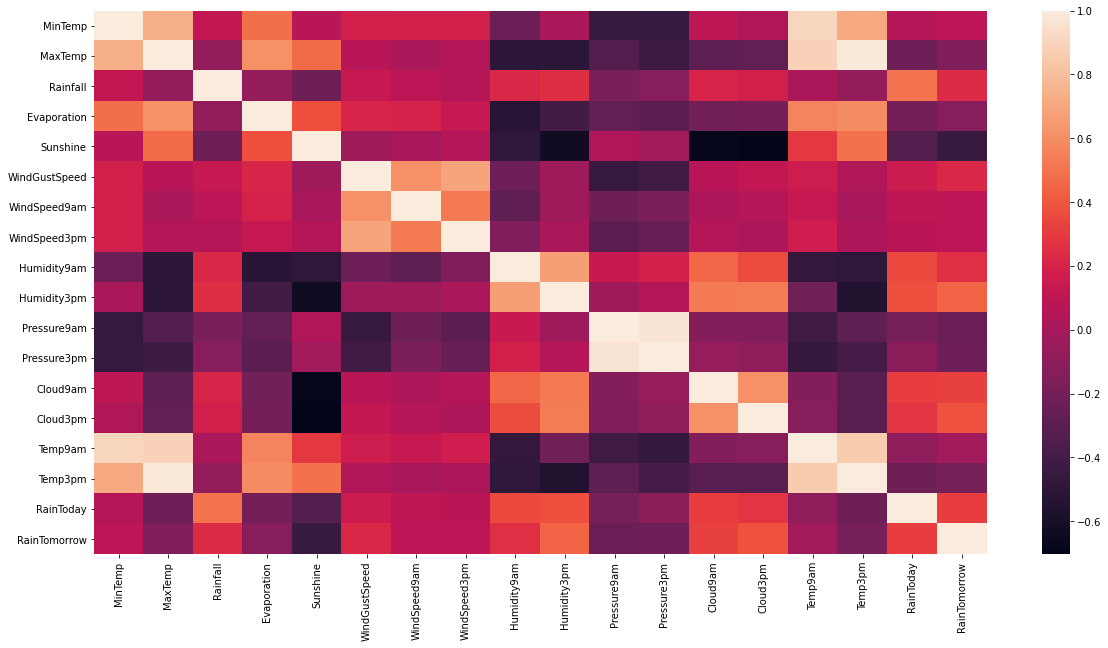

In [11]:
# Initial feature correlations
sns.heatmap(df.corr());

#### Evaporation', 'Sunshine', 'Pressure9am/3pm', 'Cloud9am/3pm' have the highest correlation (negative) with rain tomorrow. Suggests they could be the most important features. Makes sense as if it is hot and sunny then its less likely to rain

### 3.1 Similar Locations

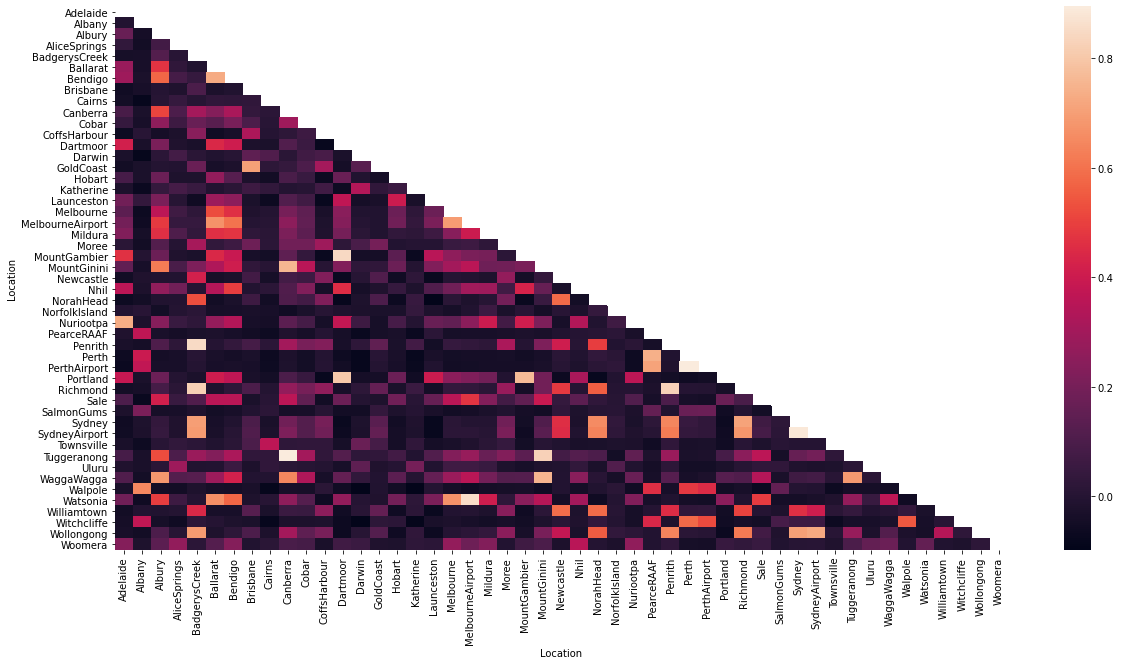

In [21]:
#Feature correlations by location (start with just rainfall)
rainfall_df = df[['Location','Date','Rainfall']]
rainfall_df = rainfall_df.pivot(index='Date', columns='Location', values='Rainfall')
mask = np.triu(np.ones_like(rainfall_df.corr()))
sns.heatmap(data=rainfall_df.corr(), mask=mask);

In [22]:
#Feature correlations by location (FOR ALL VARIABLES)
pivot_df = df.pivot(index='Date', columns='Location')#, values=['Rainfall','WindGustSpeed'])
pivot_df.columns.names = ['Feature','Location']
corr_df = pivot_df.corr()
corr_df

Feature                      MinTemp                                   \
Location                    Adelaide    Albany    Albury AliceSprings   
Feature      Location                                                   
MinTemp      Adelaide       1.000000  0.514143  0.764116     0.716595   
             Albany         0.514143  1.000000  0.603494     0.564625   
             Albury         0.764116  0.603494  1.000000     0.773270   
             AliceSprings   0.716595  0.564625  0.773270     1.000000   
             BadgerysCreek  0.632373  0.650527  0.808415     0.755910   
...                              ...       ...       ...          ...   
RainTomorrow Watsonia      -0.007363 -0.169761  0.024163    -0.049160   
             Williamtown   -0.097122  0.007454 -0.000579    -0.022312   
             Witchcliffe   -0.288243 -0.271633 -0.367063    -0.334025   
             Wollongong    -0.030530  0.061428  0.114564     0.049497   
             Woomera        0.103475 -0.052240  0.038308     0.113807   

Feature                                                                 \
Location                   BadgerysCreek  Ballarat   Bendigo  Brisbane   
Feature      Location                                                    
MinTemp      Adelaide           0.632373  0.797218  0.807952  0.623737   
             Albany             0.650527  0.468603  0.538698  0.681227   
             Albury             0.808415  0.788806  0.890962  0.745910   
             AliceSprings       0.755910  0.631937  0.708400  0.765318   
             BadgerysCreek      1.000000  0.605759  0.713808  0.835384   
...                                  ...       ...       ...       ...   
RainTomorrow Watsonia          -0.087898  0.069116  0.059444 -0.099635   
             Williamtown        0.107839 -0.045189 -0.013004  0.058196   
             Witchcliffe       -0.355159 -0.276488 -0.321563 -0.368245   
             Wollongong         0.199499  0.029786  0.082195  0.134951   
             Woomera            0.023603  0.090062  0.072846  0.002314   

Feature                                         ... RainTomorrow              \
Location                      Cairns  Canberra  ...   Townsville Tuggeranong   
Feature      Location                           ...                            
MinTemp      Adelaide       0.546850  0.657926  ...     0.266731    0.096687   
             Albany         0.575366  0.591128  ...     0.326993   -0.012802   
             Albury         0.634330  0.890871  ...     0.316554    0.228881   
             AliceSprings   0.636737  0.740473  ...     0.248986    0.121425   
             BadgerysCreek  0.645836  0.875188  ...     0.314141    0.144439   
...                              ...       ...  ...          ...         ...   
RainTomorrow Watsonia      -0.096983 -0.007526  ...    -0.073235    0.252596   
             Williamtown    0.026487  0.052650  ...     0.005684    0.105355   
             Witchcliffe   -0.337329 -0.357067  ...    -0.145908   -0.054894   
             Wollongong     0.081771  0.168802  ...     0.055694    0.299487   
             Woomera        0.025552  0.029334  ...    -0.012338    0.064337   

Feature                                                              \
Location                       Uluru WaggaWagga   Walpole  Watsonia   
Feature      Location                                                 
MinTemp      Adelaide       0.183561   0.029877 -0.164588 -0.007363   
             Albany         0.042543  -0.127619 -0.130992 -0.169761   
             Albury         0.151717   0.116875 -0.232077  0.024163   
             AliceSprings   0.211712   0.022260 -0.211549 -0.049160   
             BadgerysCreek  0.126572   0.000355 -0.207287 -0.087898   
...                              ...        ...       ...       ...   
RainTomorrow Watsonia      -0.006070   0.371665 -0.064536  1.000000   
             Williamtown    0.022649   0.052529  0.019420 -0.052627   
             Witchcliffe   -0.047302  

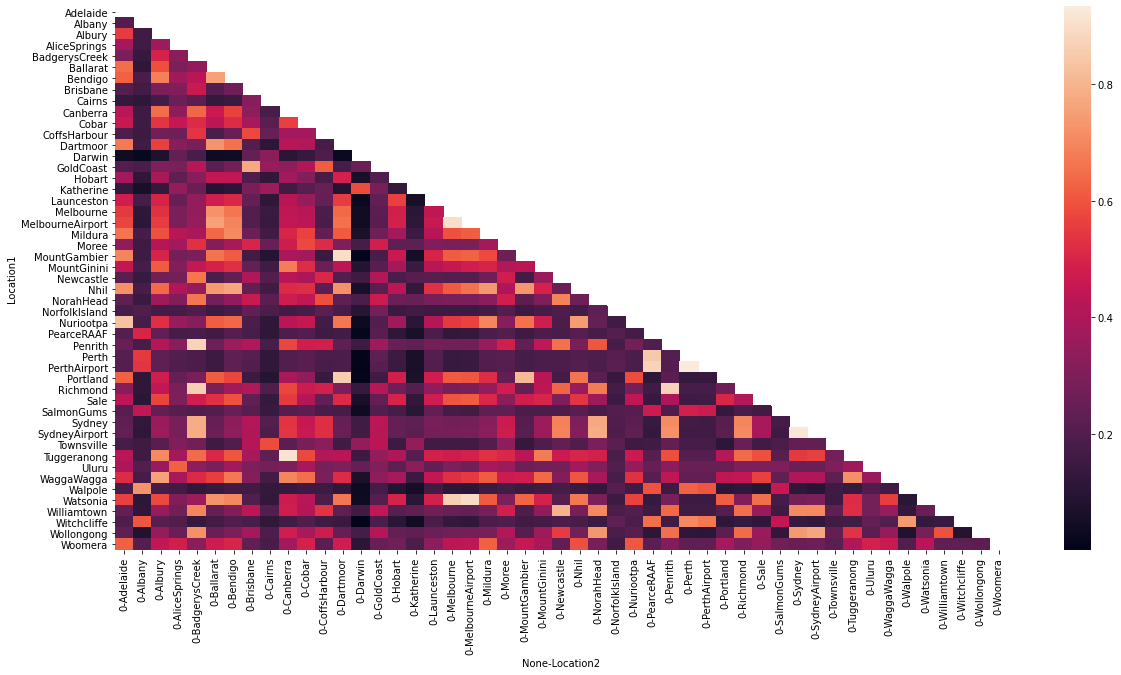

In [23]:
# Take average correlation across all variables
temp_series = corr_df.stack().stack()
temp_series.index.names = ['Feature1','Location1','Location2','Feature2']
temp_df = pd.DataFrame(temp_series)
# Only care about correlations between the same feature
temp_df = temp_df[(temp_df.index.get_level_values('Feature1') == temp_df.index.get_level_values('Feature2'))]
# Take the average
corrs = pd.DataFrame(temp_df.unstack().unstack(level=0).mean(axis=1))
location_correlations = corrs.unstack()
mask = np.triu(np.ones_like(location_correlations))
sns.heatmap(location_correlations, mask=mask);

### 3.2 Rain Check

In [24]:
#How often does it rain? Approx 20% of days
df['RainToday'].value_counts()

False    90834
True     25533
Name: RainToday, dtype: int64

In [44]:
# How often is rain tomorrow same as rain today? - 76.4% is the baseline accuracy for our models
(df['RainTomorrow'] == df['RainToday']).sum()/df['RainToday'].count()

0.7640052592229756

In [ ]:
# Confusion matrix view - false positives and false negatives occur at about the same rate
#  [tn, fp]
#  [fn, tp]
confusion_matrix(df['RainTomorrow'], df['RainToday'])

In [36]:
# is Rainfall ever >0 when RainToday is false? - Yep
df[(df['RainToday']==False) & (df['Rainfall']>0)]['Rainfall'].count()

15515

In [37]:
# Seems rainfall has to be over 1.0 to count as True
df[df['RainToday']==False]['Rainfall'].max()

1.0

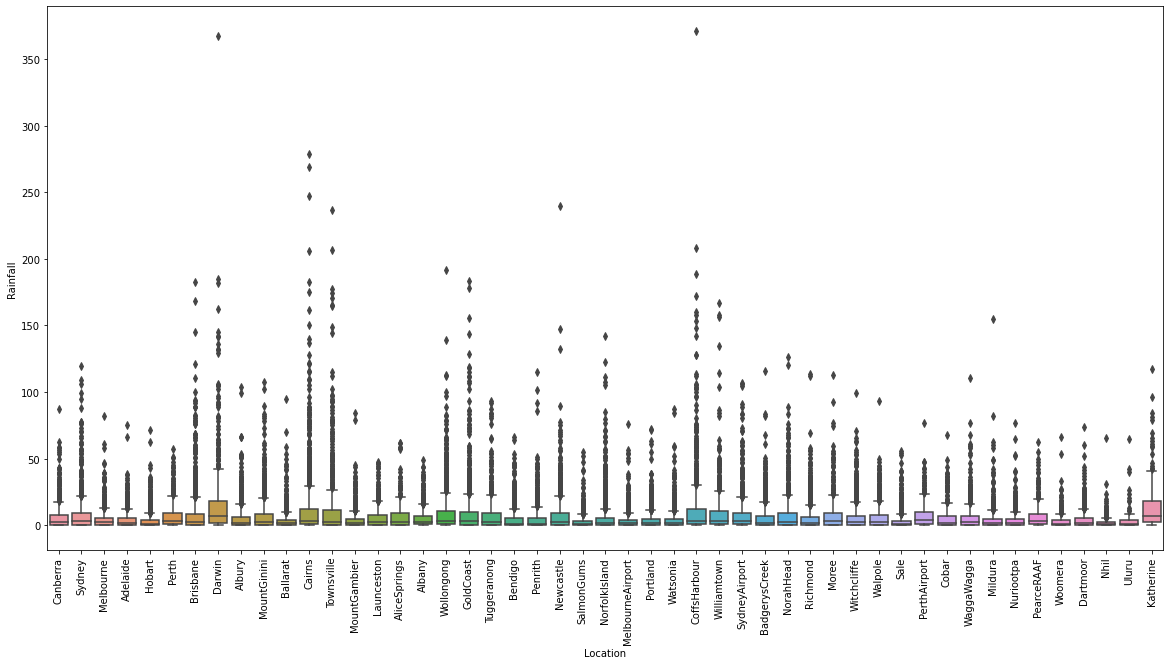

In [38]:
#Boxplot of rainfall by Location - some places like Katherine have a different baseline
ax = sns.boxplot(x="Location", y="Rainfall", data=df[df['Rainfall']>0])
plt.xticks(rotation=90);

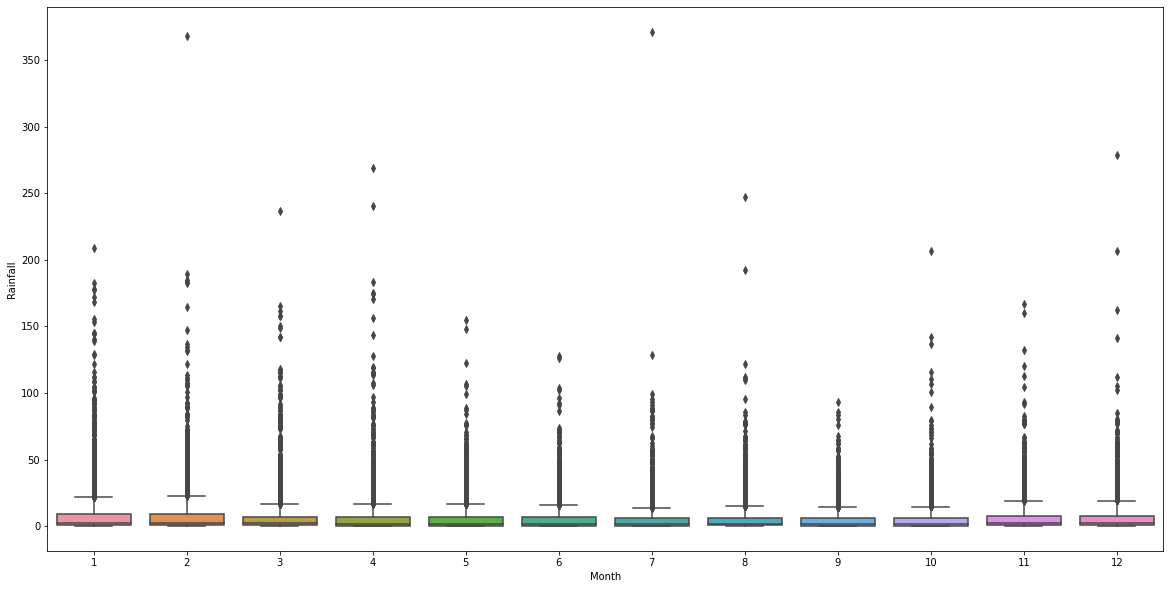

In [39]:
#Boxplot of rainfall by Month of year - hard to see much difference in the averages
df['Month'] = pd.DatetimeIndex(df['Date']).month
ax = sns.boxplot(x="Month", y="Rainfall", data=df[df['Rainfall']>0])

### 3.3 Feature Exploration

In [40]:
# What are min dates by location? - Varied, with some as late as 2013. Explains why these locations have so few rows
df.groupby('Location').min()['Date']

Location
Adelaide           2008-01-07
Albany             2008-01-12
Albury             2008-01-12
AliceSprings       2008-01-12
BadgerysCreek      2009-01-01
Ballarat           2008-01-12
Bendigo            2008-01-12
Brisbane           2008-01-07
Cairns             2008-01-12
Canberra           2007-01-11
Cobar              2009-01-01
CoffsHarbour       2009-01-01
Dartmoor           2009-01-01
Darwin             2008-01-07
GoldCoast          2008-01-12
Hobart             2008-01-07
Katherine          2013-01-03
Launceston         2008-01-12
Melbourne          2008-01-07
MelbourneAirport   2009-01-01
Mildura            2009-01-01
Moree              2009-01-01
MountGambier       2008-01-12
MountGinini        2008-01-12
Newcastle          2008-01-12
Nhil               2013-01-03
NorahHead          2009-01-01
NorfolkIsland      2009-01-01
Nuriootpa          2009-01-01
PearceRAAF         2009-01-01
Penrith            2008-01-12
Perth              2008-01-07
PerthAirport       2009-01-01
P

In [41]:
# What are max dates by location? All the same = 2015-12-10
df.groupby('Location').max()['Date']

Location
Adelaide           2015-12-10
Albany             2015-12-10
Albury             2015-12-10
AliceSprings       2015-12-10
BadgerysCreek      2015-12-10
Ballarat           2015-12-10
Bendigo            2015-12-10
Brisbane           2015-12-10
Cairns             2015-12-10
Canberra           2015-12-10
Cobar              2015-12-10
CoffsHarbour       2015-12-10
Dartmoor           2015-12-10
Darwin             2015-12-10
GoldCoast          2015-12-10
Hobart             2015-12-10
Katherine          2015-12-10
Launceston         2015-12-10
Melbourne          2015-12-10
MelbourneAirport   2015-12-10
Mildura            2015-12-10
Moree              2015-12-10
MountGambier       2015-12-10
MountGinini        2015-12-10
Newcastle          2015-12-10
Nhil               2015-12-10
NorahHead          2015-12-10
NorfolkIsland      2015-12-10
Nuriootpa          2015-12-10
PearceRAAF         2015-12-10
Penrith            2015-12-10
Perth              2015-12-10
PerthAirport       2015-12-10
P

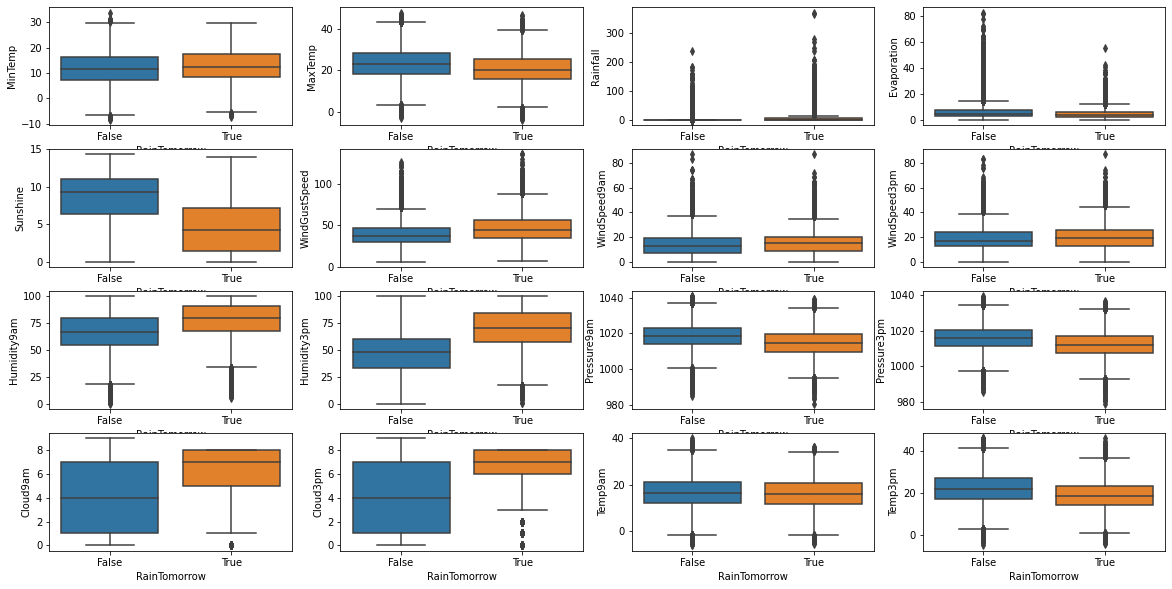

In [43]:
# Boxplots of each features and whether it rains tomorrow or not
# cloud, humidity and sunshine features seem like the strong predictors here
features_to_plot = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', #4
                    'Sunshine', 'WindGustSpeed',  'WindSpeed9am', #7
                    'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', #10
                    'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', #14
                    'Temp9am', 'Temp3pm'] #16

fig, axs = plt.subplots(ncols=4, nrows=4)
x = 0
y = 0
for f in features_to_plot:
   sns.boxplot(x="RainTomorrow", y=f, data=df, ax = axs[y][x])
   x += 1
   if x > 3:
     x=0
     y+=1

### 3.4 Windspeed Exploration

<AxesSubplot:xlabel='WindGustSpeed', ylabel='WindSpeed3pm'>

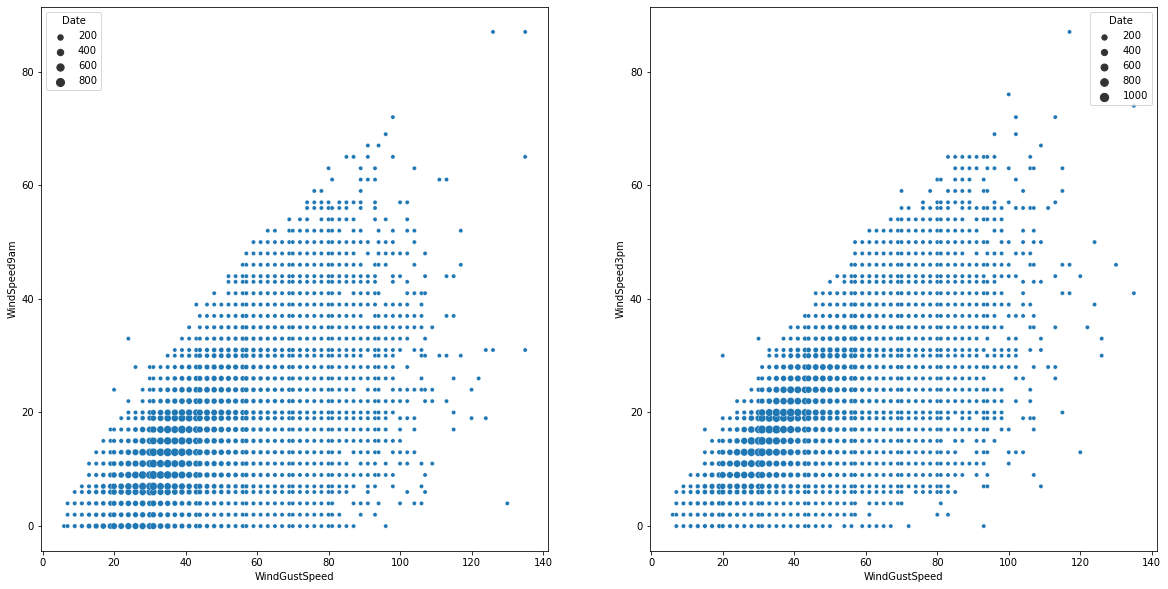

In [15]:
# Looks like sometimes when WindGustDir is null, we have data in WindDir9am or WindDir3pm, similar for speed.
# How related are these two features to the overall direction?

# Index and sub df of when both features non-null
non_null_idx = ~df['WindGustSpeed'].isnull() & ~df['WindSpeed9am'].isnull()
speed_9am_df = df[non_null_idx].groupby(['WindGustSpeed', 'WindSpeed9am']).count()
                                                                          
# Index and sub df of when both features non-null
non_null_idx = ~df['WindGustSpeed'].isnull() & ~df['WindSpeed3pm'].isnull()
speed_3pm_df = df[non_null_idx].groupby(['WindGustSpeed', 'WindSpeed3pm']).count()
           
fig, axs = plt.subplots(ncols=2)

sns.scatterplot(x='WindGustSpeed',y='WindSpeed9am',data=speed_9am_df, size='Date', ax=axs[0])
sns.scatterplot(x='WindGustSpeed',y='WindSpeed3pm',data=speed_3pm_df, size='Date', ax=axs[1])

<ipython-input-17-b17243512fb5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speeds_df['SpeedAvg'] = (speeds_df['WindSpeed9am'] + speeds_df['WindSpeed3pm'])*0.5
<ipython-input-17-b17243512fb5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speeds_df['SpeedMax'] = speeds_df[["WindSpeed9am", "WindSpeed3pm"]].max(axis=1)


<AxesSubplot:xlabel='WindGustSpeed', ylabel='SpeedMax'>

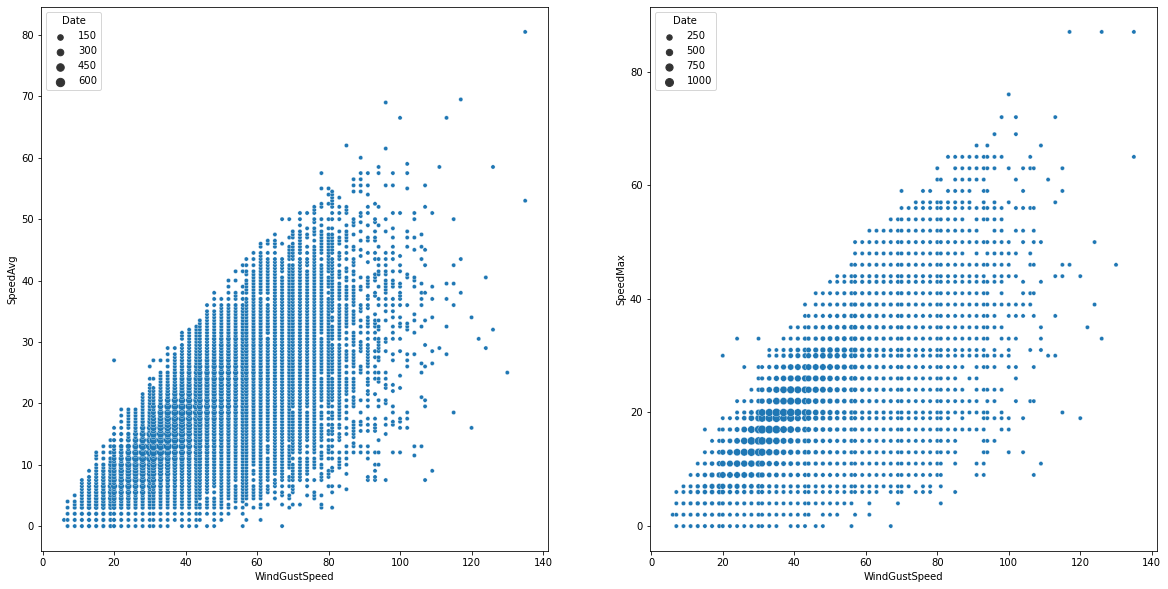

In [17]:
# Could we average them, or max them? - max looks best

non_null_idx = ~df['WindGustSpeed'].isnull() & ~df['WindSpeed9am'].isnull() & ~df['WindSpeed3pm'].isnull()
speeds_df = df[non_null_idx]

# Calculating avg speed and max speed as substitute for missing values in 'WindGustSpeed'
speeds_df['SpeedAvg'] = (speeds_df['WindSpeed9am'] + speeds_df['WindSpeed3pm'])*0.5
speeds_df['SpeedMax'] = speeds_df[["WindSpeed9am", "WindSpeed3pm"]].max(axis=1)
avg_speeds_df = speeds_df.groupby(['WindGustSpeed','SpeedAvg']).count()
max_speeds_df = speeds_df.groupby(['WindGustSpeed','SpeedMax']).count()

fig, axs = plt.subplots(ncols=2)

sns.scatterplot(x='WindGustSpeed',y='SpeedAvg',data=avg_speeds_df, size='Date', ax=axs[0])
sns.scatterplot(x='WindGustSpeed',y='SpeedMax',data=max_speeds_df, size='Date', ax=axs[1])

In [18]:
#How often do we not have any of the three?
sum(df['WindGustSpeed'].isnull() & df['WindSpeed9am'].isnull() & df['WindSpeed3pm'].isnull())

979

In [20]:
# How often is 3pm null and 9am not null?
df[ df['WindSpeed3pm'].isnull() & ~df['WindSpeed9am'].isnull() ]['WindSpeed9am'].count()

717

### 3.5 Cloud Exploration

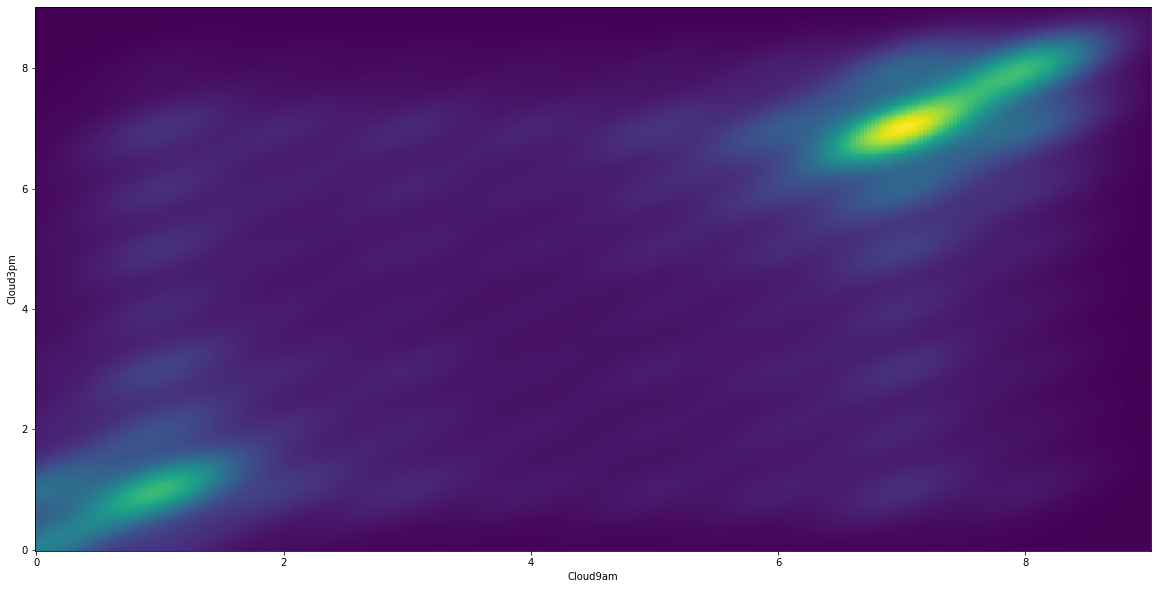

In [48]:
# heatmap of cloud9am vs cloud3pm
# Shows when its really cloudy in the morning its often cloduy in the afternoon too
x = df[df[['Cloud9am','Cloud3pm']].notna().all(axis=1)]['Cloud9am']
y = df[df[['Cloud9am','Cloud3pm']].notna().all(axis=1)]['Cloud3pm']
nbins=300
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Make the plot
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto')
plt.xlabel('Cloud9am')
plt.ylabel('Cloud3pm')
plt.show()

In [53]:
# How often do we have one cloud metric but not the other?
df[(df['Cloud9am'].isnull()) & (~df['Cloud3pm'].isnull())]['Cloud3pm'].count()

2382

In [54]:
# How often do we have one cloud metric but not the other?
df[(df['Cloud3pm'].isnull()) & (~df['Cloud9am'].isnull())]['Cloud9am'].count()

3695

In [57]:
# How often do we have neither?
df[(df['Cloud3pm'].isnull()) & (df['Cloud9am'].isnull())].count()

Date             40755
Location         40755
MinTemp          39908
MaxTemp          40045
Rainfall         38855
Evaporation       8573
Sunshine          7557
WindGustDir      39011
WindGustSpeed    39048
WindDir9am       35631
WindDir3pm       39157
WindSpeed9am     39462
WindSpeed3pm     39523
Humidity9am      39024
Humidity3pm      39199
Pressure9am      31882
Pressure3pm      31894
Cloud9am             0
Cloud3pm             0
Temp9am          39528
Temp3pm          39698
RainToday        40755
RainTomorrow     40755
Month            40755
dtype: int64